# BOSTON HOUSING DEMO:Linear Regression 

<img src='boston.jpeg' width="600" />

Dear Class,<br>

We are going to solve a real world problem using the Boston Housing dataset. Our task is to built a machine learning model to predict the housing price in Boston area. This housing dataset is a part of scikit-learn and also available on kaggle for you to download. A .csv file is also included in the course material. 
[Boston Housing Dataset on kaggle](https://www.kaggle.com/heptapod/uci-ml-datasets/data). Let's use use the one which is already included in the scikit-learn dataset repository, so that, you get to know the process to load the built-in datasets from scikit-learn as well.  

## A Data Science Case Study
You are hired by a real estate company to help them in their business goals. The company wants you to predict the housing prices in Boston area. Based on the community and safety issues, some areas are in demand. The company is interested in some kind of automated way of suggesting the price of a house based on its features.<br>




Boston House Prices dataset
===========================

You are given a dataset that contain features such as crime rate by town, proportion of residential land, nitric oxide concentration, age of the house, property tax so on.... <br>

You are happy to help because you got a job to do!<br>

Now, when you look at the dataset, you think that the linear regression is a good model to work with in this type of problem. <br>

You have the data, lets start working on the model!
<br>



Details of the full list of features is given below:


Data Set Characteristics:  
----------------------------------

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Price Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per USD 10,000 
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of non-white by town
        - LSTAT    % lower status of the population
        - price     Median value of owner-occupied homes in USD 1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)

### Let's import the libraries we need

We are already familiar with these ones!

In [99]:
# We are already familiar with these ones!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline



**Let's create a pandas dataframe by loading the data from a CSV File :** Boston_housing.csv

In [100]:
df = pd.read_csv('/Data/Boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [101]:
df.shape

(506, 14)

Let's get some information on the data, using info()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Let's have a quick view on some of the statistical information of our dataset 

In [103]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Let's do some Exploratory Data Analysis (EDA)
**It is very important to know the data, let's see how the data look like.**<br>
Let's see how the price is distributed!

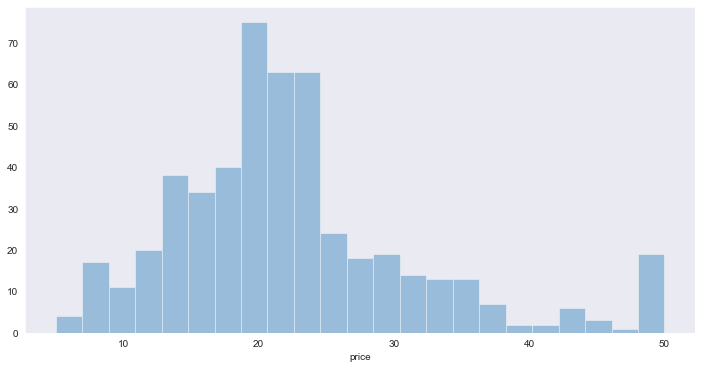

In [107]:
plt.figure(figsize=(12,6))
g=sns.distplot(df['price'], kde=False)

So, in we look at the histogram, most of the prices are in 20's. We notice that, the average price is around ~ 22K. There are some houses in 50's as well. <br>If you want, you can drop these rows where the price is in 50's, at the moment, we are keeping all the data <br><br><br>
**saborn's pairplot function is a good option to explore little more.** <br>
&#9758; Although, we can plot all the feature but the pairplot would be very crowded. Let's plot some important features to see how they are related to each other!<br>

We can check how the `Crime rate (CRIM)`, `No. of rooms (RM)`,`Age of the house (AGE)` , `% lower status of the population (LSTAT)`, ` weighted distances to five Boston employment centres (DIS)` and `price` are related to each other!

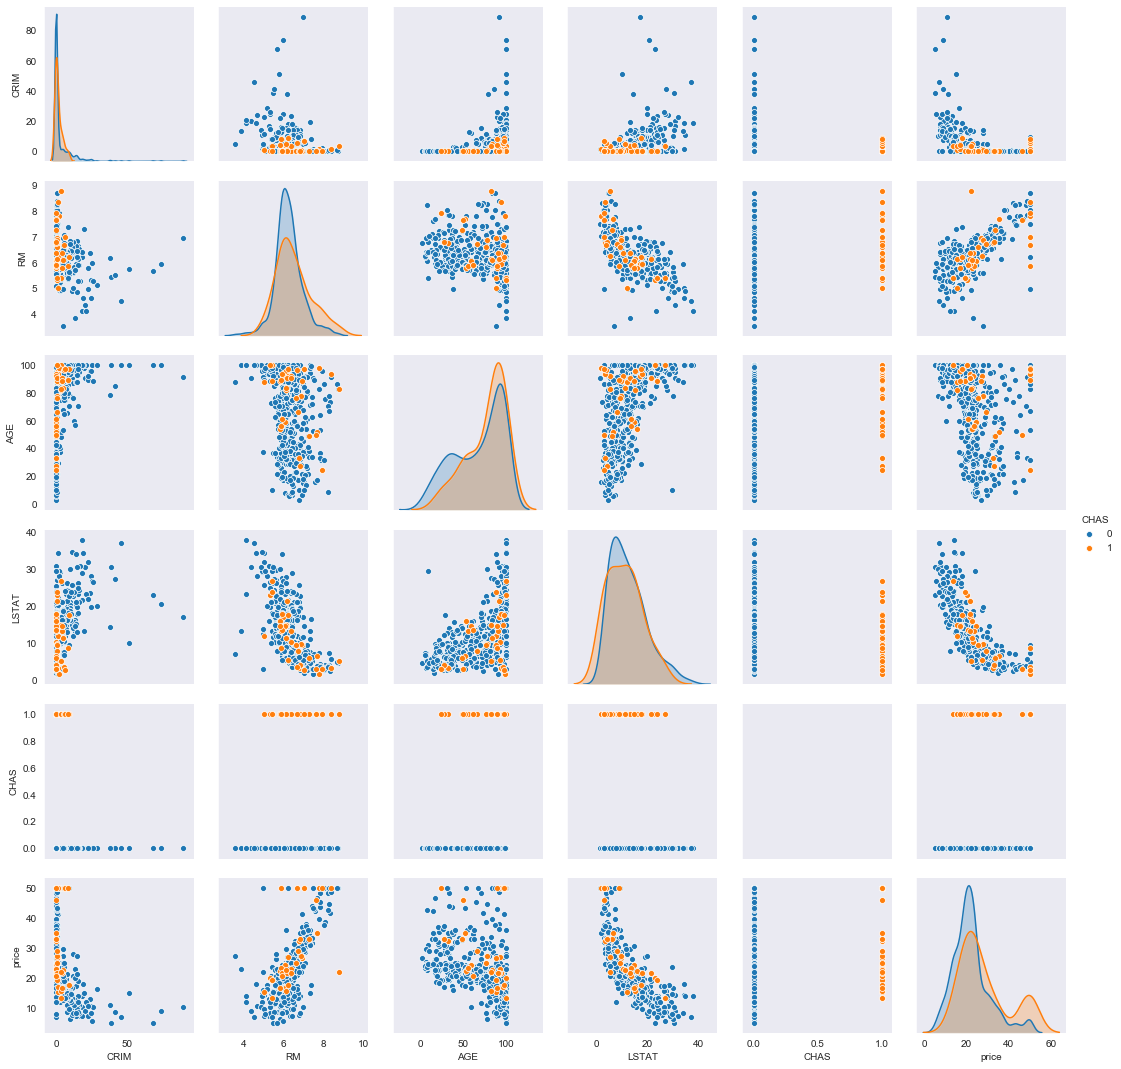

In [108]:
# Crime, No of rooms, Age of the house, Price
sns.pairplot(df[['CRIM','RM','AGE','LSTAT','CHAS','price']], hue='CHAS') 
#sns.pairplot(df) # in case you want to plot whole dataset!

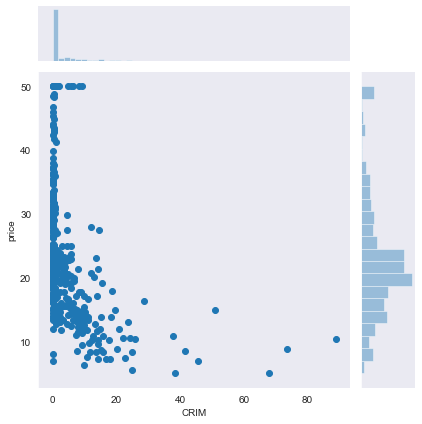

In [109]:
#Relationship of Crime vs Price

sns.jointplot(x="CRIM", y="price", data=df);

If we give a quick look on the last row, price vs selected features, we see some trends. Let's see how the heatmap looks like for the selected features!<br><br><br>
### Let's see how the correlation between selected features looks like using heatmap!<br>

In [ ]:
# Let's plot correlation for the whole dataframe 
#df.corr()


#sns.heatmap(df.corr())

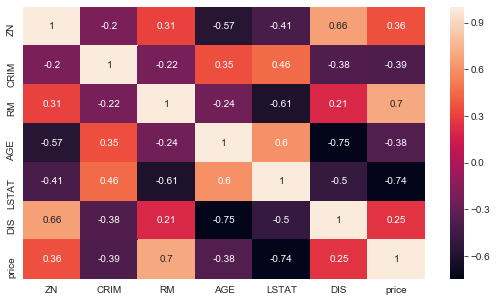

In [110]:
plt.figure(figsize=(9,5))
sns.heatmap(df[['ZN','CRIM','RM','AGE','LSTAT','DIS','price']].corr()
            , annot=True)
plt.show()

So, every column is perfectly correlated to itself along the diagonal!
we can see +ve and -ve correlation between price and other features. No of rooms have the highest value for price, that make sense, more the rooms are, higher the price is where as older the house is, lower the price you can expect!<br><br><br>


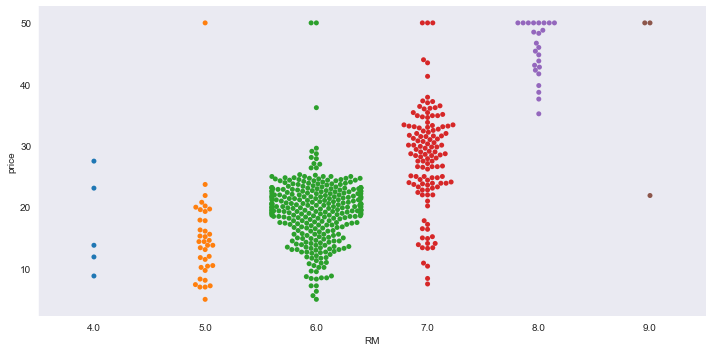

In [111]:
#Rooms vs Price
sns.set_style('dark')
data = df.copy()
data['RM']= np.round(data['RM'])
g=sns.factorplot(y='price', x='RM', data =data, kind='swarm', aspect=2)

In [ ]:
#Price vs CRIME
sns.lmplot(y='price', x='CRIM', data =data)


In [ ]:
#Price vs LSTAT
sns.lmplot(y='price', x='LSTAT', data =data)
plt.show()

In [ ]:
#Price vs CHAS
data = df.copy()
data['RM']= np.round(data['RM'])
sns.factorplot(y='price', x='CHAS', data =data, kind='swarm', aspect=2)

**You can spend more time on EDA, get more plots and see how much information you can get from your dataset. Our focus in this lecture is machine learning model and we will not spend more time on EDA. <br>**

Let's create a model to suggest the house price based on the selected features. 

**Let's move on the Machine Learning now using scikit-learn!**<br>
The first thing is to separate the data into:<br>
* X that will contain the selected features
* y will be the target values, in this case price of the house.

### X and y arrays
We are only using the selected feature, so need to pass the column names.<br>
&#9758; *I suggest, repeat the same model using all features once we are done with this lecture, that would be a good practice and you can also compare the results!*

In [ ]:
df.columns


# Linear Regression Model Training
Excited!<br>
Time to create/train our model!<br>

In [ ]:
## What we are trying to do
m=-2
intercept=14


xx=np.arange(0,10)

yy= m*xx +intercept

plt.plot(xx,yy, color='r')
plt.xlim(0,15)
plt.ylim(0,15)
plt.title(' A Linear Equation')
plt.grid()
plt.show()

## Version 1 - We will predict basis 3 features only


## Our Price Equation :  PRICE =  w1\*RM + w2\*LSTAT + w3\*PTRATIO

In [112]:

all_features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

X = df[ ['RM','LSTAT','PTRATIO'] ]
#X= df[]
y = df['price']

In [115]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

### Train Test Split 
Now we have features in X and target (price) in y. <br>
Next step is to split the data into a training set (`X_train` & `y_train`) and a testing set (`X_test` & `y_test`). <br>
We will train our model on the training dataset in `X_train` & `y_train` and then use the test dataset `X_test` & `y_test` to evaluate the model.<br>
`Scikit-learn` already has a method `train_test_split`, let's import this built-in method and do the split.<br>
We will pass our `test train data` to `train_test_split` and tell the `test_size`, which is the % of the dataset that we want in the `test data`. <br>
&#9758; Shift+Tab and copy paste train-test split!<br>
Let's leave the standard `test_size = 0.33` and `random_state = 42` at the moment. 
* *For the same data, the random_state = some number will make sure that you are getting same split if you pass the same number. if you pass the same number as mine, you will get the same results for the same data. If you pass a different random_state, you may not get the same results but it does not mean your results are not correct! This [stackflow](https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn) may help to understand more on the randon_state* 

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(' The dataset has been split sucessfully !')

 The dataset has been split sucessfully !


In [117]:
# let's check the shape and head of X_train, just for a quick look
X_train.shape , X_test.shape

((339, 3), (167, 3))

In [118]:
X_train.head()

,RM,LSTAT,PTRATIO
478,6.185,18.03,20.2
26,5.813,14.81,21.0
7,6.172,19.15,15.2
492,5.983,13.35,20.1
108,6.474,12.27,20.9



**OK!<br>
Now we have `train (X_train, y_train)` and `test (X_test, y_test)datasets`, Let's create the model.**<br>


### Creating and Training the Model

First thing first, we need linear regression model to train on our dataset! right?.<br> 

It's easy, let's import `linear_model` family from the `sklearn` so that we can use its member `LinearRegression` for our data. <br> <br>
*<font style="font-size:14px;color:green;"> We can use `from sklearn.linear_model import LinearRegression` as well and than use `lm = LinearRegression()`</font>*

In [119]:
#LinearRegression model is a part of linear_model
from sklearn.linear_model import LinearRegression
print('Import successful')

Import successful


### Create an instance for the LinearRegression model

In [120]:
lm = LinearRegression()

print('Model created')

print(lm)

Model created
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


We have create an instance `lm` (LinearRegression object) to use. <br>
If you write `lm.` and press tab in the code cell, you will find the available options, we want to use `fit()` at the moment to train the model.

### Training the model on our train dataset

In [121]:
%%time
lm.fit(X_train,y_train)
print("Regression model trained  successfully!\n")

Regression model trained  successfully!

Wall time: 1.98 ms


&#9758; We got the output above, our `LinearRegression` model has been trained on the provided data to the model!<br>

## Model Evaluation
Our model is trained, we need to evaluate our model. Let's evaluate the model by checking it's coefficients and how we can interpret them.

In [122]:
# print the intercept
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0.
print(lm.intercept_)

18.8626391748761


### Get Coefficients
Coeffecients relates each feature in the dataset, each feature will have a separate coefficient!<br>

In [123]:
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
RM,4.319280
LSTAT,-0.611781
PTRATIO,-0.852909



## Our Price Equation :  PRICE =  4.31 \*RM - 0.61 \*LSTAT -.85 \*PTRATIO

**Let's discuss coefficients briefly.**<br>
Let's take RM = 4.319280:<br>
* This suggest, if we keep all other coefficients constant, a one unit increase in the RM is associated with an increase of 4.319280 in the price. <br>
* The same is for other related coefficients. e.g. the Crime rate, age etc decreases the price according to their coefficients, keeping all other constants.  <br>

If you want further detail and mathematics behind this, please read the suggested reading assignments!

## Predictions from our Model


We have trained our model, discussed the coefficients which make some sense, now, its important to know how well the model is doing!<br>

Our model have never seen `X_test`, let's provide test data "`X_test`" to our created model and see what the predictions are. Once we get the predictions from the model, we can compare them with what we have in our `y_test`. <br>

In [124]:
# Getting predictions from the model 
predictions = lm.predict(X_test)

print('Number of  predictions is: ', len(predictions))
#

Number of  predictions is:  167


In [125]:
## See teh first 5 predictions
predictions[:5]

array([26.88634969, 30.88154954, 16.50653608, 25.30619008, 18.26692404])

In [126]:
## See teh first 5 yTest
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: price, dtype: float64

We already know the price of all homes with features in `X_test`, which is in `y_test`, let's plot `y_test` and predictions, scatter plot is a good option!

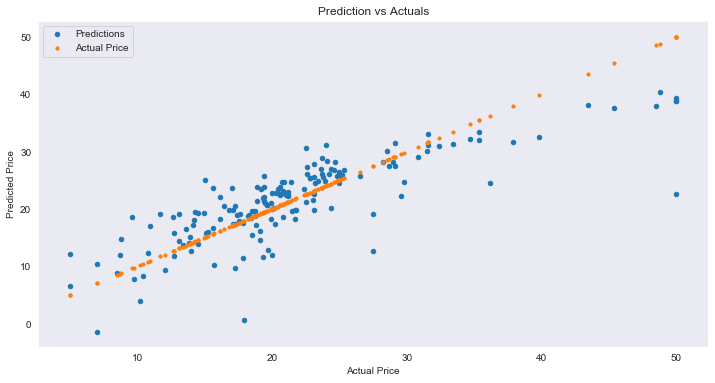

In [127]:
## Plot the predictions vs actuals
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions, s=20, label='Predictions')
plt.scatter(y_test, y_test, s=10, label = 'Actual Price')
plt.title('Prediction vs Actuals')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

Residual Histogram can tell us how much the predicted value differ from the actual value in `y_test`. We can simple do the subtraction `y_test - predictions` for this plot.  The variance of the errors should be consistent for all observations. In other words, the variance does not change for each observation or for a range of observations. This preferred condition is known as homoscedasticity (same scatter). If the variance changes, we refer to that as heteroscedasticity (different scatter).

In [ ]:
#Residual Errors scatter must show a random pattern
xx= y_test
yy= y_test-predictions
plt.scatter(x=X_test.index, y=yy)

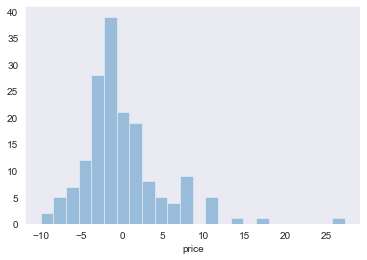

In [128]:
#Residual Errors -  Histogram
sns.distplot(y_test-predictions, kde=False)#,bins=30);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems. All of these are **loss functions**, because we want to minimize them.<br>

*Consider, ${y}$ is a vector of `n` predictions generated from a sample of `n` data points on all variables, and 
$\hat{y}$ is the vector of observed values (target values) of the variable being predicted.<br>*

**[Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)** (MAE) is the mean of the absolute value of the errors: <br>
it's the average error!

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i  |$$

**[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)** (MSE) is the mean of the squared errors:<br>
**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**[Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)** (RMSE) is the square root of the mean of the squared errors:<br>
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. <br><br>The root-mean-squared error (**RMSE**) **or** root-mean-square deviation (**RMSD**), is a frequently used measure of the differences between values predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
<br><br><br>
Let's calculate MAE, MSE and RMSE for our model. <br>We need to pass the y_test and predictions to the respective method!<br>

We need to do another import here!

In [129]:
#Regression Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error,r2_score

In [130]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R-squared:', r2_score(y_test, predictions))

MAE: 3.5336474011404073
MSE: 24.983722701874886
RMSE: 4.998372005150766
R-squared: 0.669870307447006


In [131]:
# Show it nicely in a dataframe
res_dict={'metric': ['MAE','MSE','RMSE','R-squared'] , 
          'Values': [mean_absolute_error(y_test, predictions),
                     mean_squared_error(y_test, predictions),
                     np.sqrt(mean_squared_error(y_test, predictions)),
                     r2_score(y_test, predictions)] }
res_df = pd.DataFrame(data = res_dict)
res_df

,metric,Values
0,MAE,3.533647
1,MSE,24.983723
2,RMSE,4.998372
3,R-squared,0.669870


### Make predictions for your clients

<table align='left' width='100%'> <tr> <th>Feature</th><th>	Client 1</th><th>	Client 2</th><th>	Client 3</th></tr>

<tr> <td>Total number of rooms in home	</td><td> 5 rooms</td><td>	4 rooms</td><td>8 rooms</td></tr>
<tr> <td>Neighborhood poverty level (as %)</td><td>	17%</td><td>	12%	</td><td>3%</td></tr>
<tr> <td>Student-teacher ratio of nearby schools</td><td>	15-to-1</td><td>	22-to-1</td><td>	12-to-1</td></tr>
    </table>

In [132]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 12, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(lm.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price*1000))

Predicted selling price for Client 1's home: $17,265.12
Predicted selling price for Client 2's home: $10,034.39
Predicted selling price for Client 3's home: $41,346.63


In [ ]:
#lm.predict([client_data[1]])

### Version 2 : Add all columns

In [133]:
all_features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']


X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
# Load the features to a variable X (note: we have 7 features now, so the first 7 columns need to be selected.)


# Load y variable
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#Instantiate the algorithm
lr = LinearRegression()

# Training the model on our train dataset
lr.fit(X_train,y_train)

# Get predictions
predictions = lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared' , metrics.r2_score(y_test, predictions))


MAE: 3.417472278801672
MSE: 20.698475744484433
RMSE: 4.549557752626559
R-squared 0.7649416667641524


In [134]:
coeffs = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
CRIM,-0.099200
ZN,0.062781
INDUS,0.072581
CHAS,3.010774
NOX,-20.661788
RM,3.444966
AGE,0.003780
DIS,-1.448275
RAD,0.309305
TAX,-0.011649


In [135]:
lr.intercept_

39.682807927499944

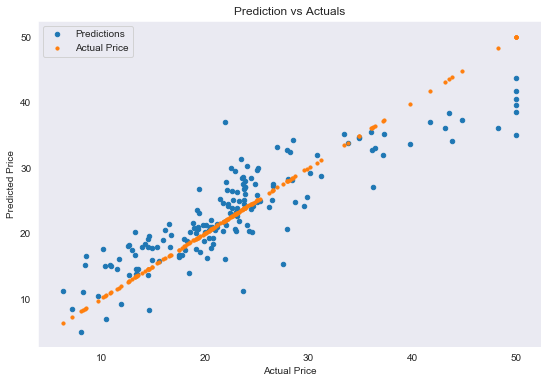

In [136]:
## Plot the predictions vs actuals
plt.figure(figsize=(9,6))
plt.scatter(y_test,predictions, s=20, label='Predictions')
plt.scatter(y_test, y_test, s=10, label = 'Actual Price')
plt.title('Prediction vs Actuals')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### Version 3 : RandomForestRegressor

In [137]:
# IMPORTING VARIOUS Regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [138]:

# Load the features to a variable X (note: we have 7 features now, so the first 7 columns need to be selected.)
X= df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]

# Load y variable
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#Instantiate the algorithm
rf = RandomForestRegressor(n_estimators=10, max_depth=6,min_samples_leaf=5,min_samples_split=10 ) 

# Training the model on our train dataset
rf.fit(X_train,y_train)

# Get predictions
predictions = rf.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared' , metrics.r2_score(y_test, predictions))

MAE: 2.5834443362905106
MSE: 12.540954031381451
RMSE: 3.5413209444191094
R-squared 0.8575810224774919


In [139]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
## Plot the predictions vs actuals
plt.figure(figsize=(9,6))
plt.scatter(y_test,predictions, s=20, label='Predictions')
plt.scatter(y_test, y_test, s=10, label = 'Actual Price')
plt.title('Prediction vs Actuals')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

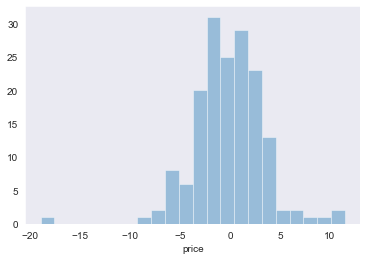

In [140]:
#Residual Errors -  Histogram
sns.distplot(y_test-predictions, kde=False)#,bins=30);

###  Version 4 : Trying many  algorithms together, with scaling

In [141]:
%%time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor


# Load the features to a variable X (note: we have 7 features now, so the first 7 columns need to be selected.)
X= df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]

# Load y variable

y = df['price']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

resultdf = pd.DataFrame(columns=['Algo', 'MAE','RMSE', 'R2'])
a = 0.3
rowcnt=0

for name,algo in [
        ('Linear regression', LinearRegression()),
        ('Lasso', Lasso(fit_intercept=True, alpha=a)),
        ('Ridge', Ridge(fit_intercept=True, alpha=a)),
        ('Elastic-net', ElasticNet(fit_intercept=True, alpha=a)),
        ('SGD ',SGDRegressor(alpha=0.05,penalty='none')),
        ('DecisionTreeRegressor',DecisionTreeRegressor(max_depth=4)),
        ('Support Vector Linear',SVR(kernel='linear', C=1)),
        ('Random Forest',RandomForestRegressor()),
        ('Gradient Boosting',GradientBoostingRegressor())
        ]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

    #Instantiate the algorithm
    lr = algo

    # Training the model on our train dataset
    lr.fit(X_train,y_train)

    # Get predictions
    predictions = lr.predict(X_test)
    mae=metrics.mean_absolute_error(y_test, predictions)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
    r2=metrics.r2_score(y_test, predictions)
                 
    resultdf.loc[rowcnt]=[name,mae,rmse,r2]
    rowcnt=rowcnt+1
    print('Model ',name)
    #print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    #print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R-squared' , metrics.r2_score(y_test, predictions))
    print('-----------------------------------')



Model  Linear regression
RMSE: 4.549557752626555
R-squared 0.7649416667641529
-----------------------------------
Model  Lasso
RMSE: 4.8751459080949635
R-squared 0.7300940093519327
-----------------------------------
Model  Ridge
RMSE: 4.549048091319247
R-squared 0.764994328334203
-----------------------------------
Model  Elastic-net
RMSE: 4.917751939756497
R-squared 0.7253557416083919
-----------------------------------
Model  SGD 
RMSE: 4.558719694844077
R-squared 0.7639939881347798
-----------------------------------
Model  DecisionTreeRegressor
RMSE: 3.8826349753122043
R-squared 0.8288052617311626
-----------------------------------
Model  Support Vector Linear
RMSE: 4.757324746995472
R-squared 0.7429823878131127
-----------------------------------
Model  Random Forest
RMSE: 3.2098428030604986
R-squared 0.882994893667155
-----------------------------------
Model  Gradient Boosting
RMSE: 2.8120494282590873
R-squared 0.9101985833612822
-----------------------------------
Wall time: 

In [142]:
resultdf.sort_values(by='R2', ascending=False)


,Algo,MAE,RMSE,R2
8,Gradient Boosting,2.053005,2.812049,0.910199
7,Random Forest,2.291910,3.209843,0.882995
5,DecisionTreeRegressor,2.849674,3.882635,0.828805
2,Ridge,3.416433,4.549048,0.764994
0,Linear regression,3.417472,4.549558,0.764942
4,SGD,3.417309,4.558720,0.763994
6,Support Vector Linear,3.303681,4.757325,0.742982
1,Lasso,3.650402,4.875146,0.730094
3,Elastic-net,3.663441,4.917752,0.725356


# Congratulations !  End of Exercise

### Additional Material - Using ANN

In [ ]:
from keras import models
from keras import layers

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop',
          loss='mse',
          metrics=['mae'])

In [ ]:
%%time 
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# Epoch 200 gives RMSE .88
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared' , metrics.r2_score(y_test, predictions))

### Video on Bias and Variance 

https://www.youtube.com/watch?v=EuBBz3bI-aA

### Getting F -Tests and P Values

https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/

In [ ]:
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/Data/Boston_housing.csv')
X=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

In [ ]:
# Confidence Intervals
res.conf_int()

####  The p-values of  AGE, NOX, TAX, RAD, INDUS are too high

In [ ]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

In [ ]:
# Compared to a LR model (X_train)
#Instantiate the algorithm
#from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Training the model on our train dataset
lr.fit(X_train,y_train)

# Get predictions
predictions = lr.predict(X_train)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R-squared' , metrics.r2_score(y_train, predictions))

coeffs = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeffs

In [ ]:
residuals_1 = predictions-y_train

plt.hist(residuals_1)
plt.show()

In [ ]:
residuals_1.describe()

In [ ]:
# Compared to a LR model (X_test)
#Instantiate the algorithm
#from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Training the model on our train dataset
lr.fit(X_train,y_train)

# Get predictions
predictions = lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared' , metrics.r2_score(y_test, predictions))

coeffs = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeffs